<h1> <b> Lab - 10 </b> </h1>
<h3>Artificial Neural Network on mnist dataset.</h3>
<br>

In [1]:
pip install -q tfds-nightly tensorflow matplotlib

     |████████████████████████████████| 4.2 MB 4.3 MB/s 
     |████████████████████████████████| 76 kB 5.1 MB/s 
     |████████████████████████████████| 462 kB 45.1 MB/s 


<br/><h2> <b> Import necessary modules.</b> </h2><br/>

In [2]:
# Import Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import tensorflow
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

<br/><h2> <b> Load the data.</b> </h2><br/>


In [3]:
from tensorflow.keras.datasets import mnist
(features_train, targets_train), (features_test, targets_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


<br/><h2> <b> Convert to float32.</b> </h2><br/>

In [4]:
features_train, features_test = np.array(features_train, np.float32), np.array(features_test, np.float32)

<br/><h2> <b>Flatten images to 1-D vector of 784 features (28*28).</b> </h2><br/>

In [5]:
features_train, features_test = features_train.reshape([-1, 784]), features_test.reshape([-1, 784])

<br/><h2> <b>Normalize images value from [0, 255] to [0, 1].</b> </h2><br/>

In [6]:
features_train, features_test = features_train / 255., features_test / 255.

<br/><h2> <b>Create feature and targets tensor for train set. As you remember we need variable to accumulate gradients. Therefore first we create tensor, then we will create variable[0, 255] to [0, 1].</b> </h2><br/>

In [7]:
torch_features_train = torch.from_numpy(features_train)
torch_targets_train = torch.from_numpy(targets_train).type(torch.LongTensor)

<br/><h2> <b>Create feature and targets tensor for test set.</b> </h2><br/>

In [8]:
torch_features_test = torch.from_numpy(features_test)
torch_targets_test = torch.from_numpy(targets_test).type(torch.LongTensor)

<br/><h2> <b>Batch_size, epoch and iteration</b> </h2><br/>

In [9]:
batch_size = 100
n_iters = 5000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

<br/><h2> <b>Pytorch train and test sets - Tensordataset.</b> </h2><br/>

In [10]:
train_data = TensorDataset(torch_features_train, torch_targets_train)
test_data = TensorDataset(torch_features_test,torch_targets_test)


<br/><h2> <b>Data loader.</b> </h2><br/>

In [11]:
train_loader = DataLoader(train_data, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test_data, batch_size = batch_size, shuffle = False)

<br/><h2> <b>Visualize one of the images in data set.</b> </h2><br/>



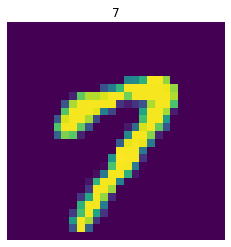

In [13]:
plt.imshow(features_train[15].reshape(28,28))
plt.axis("off")
plt.title(str(targets_train[15]))
plt.savefig('image.png')
plt.show()

<br/><h2> <b>Create ANN Model</b> </h2><br/>

In [14]:
class ANNModel(nn.Module):
  def __init__(self, input_dim, hidden_dim, output_dim):
    super(ANNModel, self).__init__()

    # hidden layer dimensions
    self.hidden_dim = hidden_dim

    self.fc1 = nn.Linear(input_dim, hidden_dim) 
    self.relu1 = nn.ReLU()
    self.fc2 = nn.Linear(hidden_dim, hidden_dim)
    self.relu2 = nn.ReLU()
    self.fc3 = nn.Linear(hidden_dim, hidden_dim)
    self.relu3 = nn.ReLU()
    self.fc4 = nn.Linear(hidden_dim, output_dim) 

  def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        out = self.relu3(out)
        out = self.fc4(out)
        return out

<br/><h2> <b>Instantiate ANN</b> </h2><br/>

In [15]:
input_dim = 28 * 28
hidden_dim = 150 
output_dim = 10

<br/><h2> <b>Create ANN</b> </h2><br/>

In [16]:
model = ANNModel(input_dim, hidden_dim, output_dim)

<br/><h2> <b>Cross Entropy Loss.</b> </h2><br/>

In [17]:
error = nn.CrossEntropyLoss()

<br/><h2> <b>SGD Optimizer.</b> </h2><br/>

In [19]:
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

<br/><h2> <b>ANN model training.</b> </h2><br/>

In [20]:
count = 0
loss_list = []
iteration_list = []
accuracy_list = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        
        # Clear gradients
        optimizer.zero_grad()

        # Forward propagation
        outputs = model(train) 
        
        # Calculate softmax and cross entropy loss
        loss = error(outputs, labels) 
        
        # Calculating gradients
        loss.backward() 
        
        # Update parameters
        optimizer.step() 
        
        count += 1
        
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            
            # Predict test dataset
            for images, labels in test_loader:
                test = Variable(images.view(-1, 28*28))
                
                # Forward propagation
                outputs = model(test) 
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1] 
                
                # Total number of labels
                total += len(labels) 
                
                # Total correct predictions
                correct += (predicted == labels).sum() 
            
            accuracy = 100.0 * correct.item() / total
            
            # store loss and iteration
            loss_list.append(loss.data.item())
            iteration_list.append(count)
            accuracy_list.append(accuracy)

            # print loss
            if count % 500 == 0:
                print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data.item(), accuracy))

Iteration: 500  Loss: 1.9405499696731567  Accuracy: 56.49 %
Iteration: 1000  Loss: 0.6305919885635376  Accuracy: 84.7 %
Iteration: 1500  Loss: 0.6315626502037048  Accuracy: 88.03 %
Iteration: 2000  Loss: 0.3100878596305847  Accuracy: 89.03 %
Iteration: 2500  Loss: 0.21487699449062347  Accuracy: 91.04 %
Iteration: 3000  Loss: 0.3391537070274353  Accuracy: 91.64 %
Iteration: 3500  Loss: 0.21304219961166382  Accuracy: 92.51 %
Iteration: 4000  Loss: 0.27803483605384827  Accuracy: 93.57 %
Iteration: 4500  Loss: 0.36640116572380066  Accuracy: 93.73 %


<br/><h2> <b>Visualize loss and accuracy.</b> </h2><br/>

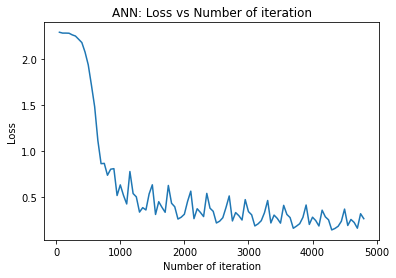

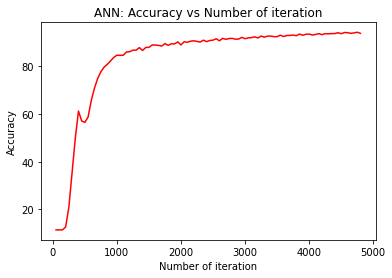

In [21]:
plt.plot(iteration_list, loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()


plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()